Pair Programming Repaso Conceptos Resumidos
Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo. El objetivo de este pair programming es:

    1. Hacer una exploración inicial del dataframe.
        1.1. ¿Cuántas filas tiene?


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("NY Realstate Pricing.csv", index_col = 0)

In [4]:
df.head()

,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
F1,,,,,,,,,,,
0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [5]:
df.shape #miramos las filas y columnas

(17614, 11)

        1.2. ¿Cuántas nulos tiene?


In [6]:
df.isnull().sum() # calculamos los nulos

id                       0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
days_occupied_in_2019    0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_2020        0
dtype: int64

        1.3. ¿Y duplicados?


In [7]:
df.duplicated().sum() # calculamos los duplicados

0

        1.4. ¿Qué tipo de datos tenemos en el dataframe?


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17614 entries, 0 to 25441
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17614 non-null  int64  
 1   neighbourhood          17614 non-null  object 
 2   latitude               17614 non-null  float64
 3   longitude              17614 non-null  float64
 4   room_type              17614 non-null  object 
 5   price                  17614 non-null  int64  
 6   days_occupied_in_2019  17614 non-null  int64  
 7   minimum_nights         17614 non-null  int64  
 8   number_of_reviews      17614 non-null  int64  
 9   reviews_per_month      17614 non-null  float64
 10  availability_2020      17614 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 1.6+ MB


In [9]:
df["neighbourhood"].value_counts()

Brooklyn              3875
Manhattan             3229
Queens                1099
Bedford-Stuyvesant     799
Harlem                 632
                      ... 
Sea Gate                 1
Marble Hill              1
Midland Beach            1
Mill Basin               1
Van Nest                 1
Name: neighbourhood, Length: 186, dtype: int64

In [10]:
df["room_type"].value_counts()

Entire home/apt    9405
Private room       7752
Shared room         357
Hotel room          100
Name: room_type, dtype: int64

In [11]:
df["number_of_reviews"].value_counts()

1      760
2      652
3      550
4      519
5      440
      ... 
416      1
364      1
395      1
302      1
242      1
Name: number_of_reviews, Length: 408, dtype: int64

In [12]:
df.sample(5)

,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
F1,,,,,,,,,,,
30338,25967894,Manhattan,40.84963,-73.93720,Entire home/apt,100,314,2,23,1.45,46
181,51850,Jamaica,40.67252,-73.76597,Private room,55,29,2,53,0.48,307
21788,18993091,Brooklyn,40.61767,-73.99176,Private room,80,274,5,31,1.03,54
2689,1682963,Staten Island,40.61022,-74.06507,Private room,125,21,4,6,0.09,179
11693,9597111,Midtown,40.75429,-73.99198,Private room,99,64,2,6,0.12,330


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,17614.0,1.572032e+07,9.644155e+06,2595.00000,6.718288e+06,1.654699e+07,2.407707e+07,3.056528e+07
latitude,17614.0,4.072675e+01,5.698110e-02,40.50868,4.068604e+01,4.072054e+01,4.076313e+01,4.090804e+01
longitude,17614.0,-7.394773e+01,5.021280e-02,-74.23986,-7.398094e+01,-7.395305e+01,-7.393068e+01,-7.372179e+01
price,17614.0,1.454555e+02,1.949907e+02,0.00000,7.000000e+01,1.090000e+02,1.700000e+02,9.999000e+03
days_occupied_in_2019,17614.0,1.795177e+02,1.302020e+02,0.00000,3.500000e+01,1.980000e+02,3.010000e+02,3.640000e+02
minimum_nights,17614.0,7.392926e+00,1.923387e+01,1.00000,2.000000e+00,3.000000e+00,5.000000e+00,1.125000e+03
number_of_reviews,17614.0,5.612899e+01,6.597237e+01,1.00000,9.000000e+00,3.300000e+01,7.900000e+01,6.750000e+02
reviews_per_month,17614.0,1.607060e+00,1.635528e+00,0.01000,3.400000e-01,1.060000e+00,2.460000e+00,1.925000e+01
availability_2020,17614.0,1.541548e+02,1.380797e+02,0.00000,8.000000e+00,1.250000e+02,3.090000e+02,3.650000e+02


In [14]:
df["estancia_media"] = pd.cut(x = df["days_occupied_in_2019"], bins = [-1, 1, 7, 30, 180, 366], labels = ["Nulo", "Bajo", "Medio", "Alto", "Muy_alto"])

In [15]:
df.drop(["latitude", "longitude", "days_occupied_in_2019", "id" ], axis = 1, inplace= True)

In [16]:
df.sample(5)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,estancia_media
F1,,,,,,,,
24616,Flushing,Entire home/apt,110,30,6,0.26,265,Alto
30291,Lefferts Garden,Entire home/apt,110,2,68,3.93,33,Muy_alto
25134,Manhattan,Entire home/apt,150,2,88,3.44,94,Muy_alto
1533,Brooklyn,Private room,125,3,288,3.36,0,Alto
34392,Harlem,Private room,90,2,54,4.15,91,Alto


        1.5. etc.
    2. Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.


In [17]:

moda = df["price"].mode()
print(f"La moda (el precio que más se repite en nuestro set de datos) es {moda[0]}")

La moda (el precio que más se repite en nuestro set de datos) es 150


In [18]:
mediana = df["price"].median()
print(f"La mediana es {mediana}")

La mediana es 109.0


In [19]:
media = df["price"].mean()
print(f"La media es {media}")

La media es 145.4554899511752


In [20]:
minimo = df["price"].min()
print(f"El precio minimo es {minimo}")

El precio minimo es 0


In [21]:
df_estancia = df.groupby("estancia_media")["price"].mean().reset_index()

In [22]:
df_estancia.head()

,estancia_media,price
0,Nulo,213.253814
1,Bajo,162.546218
2,Medio,146.436806
3,Alto,145.409217
4,Muy_alto,138.993497


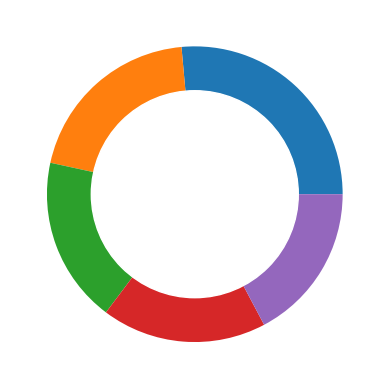

In [23]:
plt.pie(df_estancia["price"])

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

<AxesSubplot:xlabel='estancia_media', ylabel='price'>

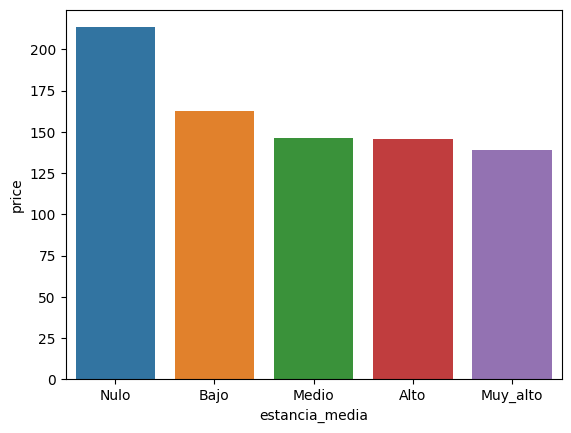

In [24]:
sns.barplot(x=df_estancia["estancia_media"], y=df_estancia["price"])

In [25]:
df.head(1)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,estancia_media
F1,,,,,,,,
0,Midtown,Entire home/apt,225,10,48,0.39,1,Medio


    3. Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten